**Proyecto Tutorial K-Medias**

- Comprender un dataset nuevo.
- Modelar los datos utilizando un K-Means.
- Analizar los resultados y entrenar un modelo supervisado.

**🌱 Cómo iniciar este proyecto**

Sigue las siguientes instrucciones:

- Crea un nuevo repositorio basado en el proyecto de Machine Learning o haciendo clic aquí.
- Abre el repositorio creado recientemente en Codespace usando la extensión del botón de Codespace.
- Una vez que el VSCode del Codespace haya terminado de abrirse, comienza tu proyecto siguiendo las instrucciones a continuación.
**🚛 Cómo entregar este proyecto**

Una vez que hayas terminado de resolver el caso práctico, asegúrate de confirmar tus cambios, haz push a tu repositorio y ve a 4Geeks.com para subir el enlace del repositorio.

**📝 Instrucciones**
Sistema de agrupación de casas
Queremos ser capaces de clasificar casas según su la región en la que se encuentren y del ingreso medio. Para ello, utilizaremos el famoso conjunto de datos California Housing. Se construyó utilizando los datos del censo de California de 1990. Contiene una fila por grupo de bloques censales. Un grupo de bloques es la unidad geográfica más pequeña para la que se publican datos del censo de USA.

- Paso 1: Carga del conjunto de datos
El conjunto de datos se puede encontrar en esta carpeta de proyecto bajo el nombre housing.csv. Puedes cargarlo en el código directamente desde el siguiente enlace:

https://breathecode.herokuapp.com/asset/internal-link?id=809&path=housing.csv
O descargarlo y añadirlo a mano en tu repositorio. En este caso solo nos interesan las columnas Latitude, Longitude y MedInc.

Asegúrate de dividir convenientemente el conjunto de datos en train y test como hemos visto en lecciones anteriores. Aunque estos conjuntos no se utilicen para obtener estadísticas, podrás utilizarlos para entrenar el algoritmo no supervisado y luego para hacer predicciones sobre puntos nuevos para predecir el cluster al que se asocian.

- Paso 2: Construye un K-Means
Clasifica los datos en 6 clusters utilizando, para ello, el modelo K-Means. A continuación, almacena el cluster al que pertenece cada casa como una columna nueva del dataset. Podrías llamarla cluster. Para introducirla a tu conjunto de datos quizá tengas que categorizarla. Observa qué formato y valores tiene y actúa en consecuencia. Grafícala en un diagrama de puntos y describe lo que ves.

- Paso 3: Predice con el conjunto de test
Ahora utiliza el modelo entrenado con el conjunto test y añade los puntos al gráfico anterior para confirmar que la predicción es satisfactoria o no.

- Paso 4: Entrena un modelo de clasificación supervisada
Ahora que el K-Means nos ha devuelto una categorización (agrupación) de los puntos para los conjuntos de entrenamiento y prueba, estudia qué modelo podría ser más útil y entrénalo. Obtén las estadísticas y describe lo que ves.

Este flujo es muy común cuando contamos con datos no etiquetados: utilizar un modelo de aprendizaje no supervisado para etiquetarlos de forma automática y a continuación, un modelo de aprendizaje supervisado.

- Paso 5: Guarda los modelos
Almacena ambos modelos en la carpeta correspondiente.

Nota: También incorporamos muestras de solución en ./solution.ipynb que te sugerimos honestamente que solo uses si estás atascado por más de 30 minutos o si ya has terminado y quieres compararlo con tu enfoque.

## Imports

In [135]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import geopandas as gpd
import contextily as ctx
import pickle
from yellowbrick.cluster import KElbowVisualizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.patches as mpatches
from sklearn.neighbors import KNeighborsClassifier

## Limpieza de datos

In [77]:
df = pd.read_csv("/workspaces/machine-learning-elius123ef/data/raw/housing.csv")
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Eliminamos las columnas que no nos interesa

In [78]:
df = df.drop(["MedHouseVal",	"HouseAge",	"AveRooms",	"AveBedrms",	"Population",	"AveOccup"], axis=1)
df

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


### Buscamos valores nulos o duplicados

In [79]:
df.duplicated().sum()

np.int64(5)

In [80]:
df.drop_duplicates(inplace=True)


In [81]:
df.duplicated().sum()

np.int64(0)

In [82]:
df.isnull().sum()

MedInc       0
Latitude     0
Longitude    0
dtype: int64

In [83]:
X = df

## Escalado


In [84]:
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)

X_robust_scaler = pd.DataFrame(X, columns=['longitude', 'latitude', 'MedInc'])
X_robust_scaler

,longitude,latitude,MedInc
0,2.197981,0.957672,-0.986807
1,2.187061,0.952381,-0.984169
2,1.708052,0.949735,-0.989446
3,0.967378,0.949735,-0.992084
4,0.142923,0.949735,-0.992084
...,...,...,...
20630,-0.905896,1.380952,-0.686016
20631,-0.448681,1.383598,-0.717678
20632,-0.841799,1.367725,-0.720317
20633,-0.765084,1.367725,-0.746702


## Modelo no supervisado

### K means

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

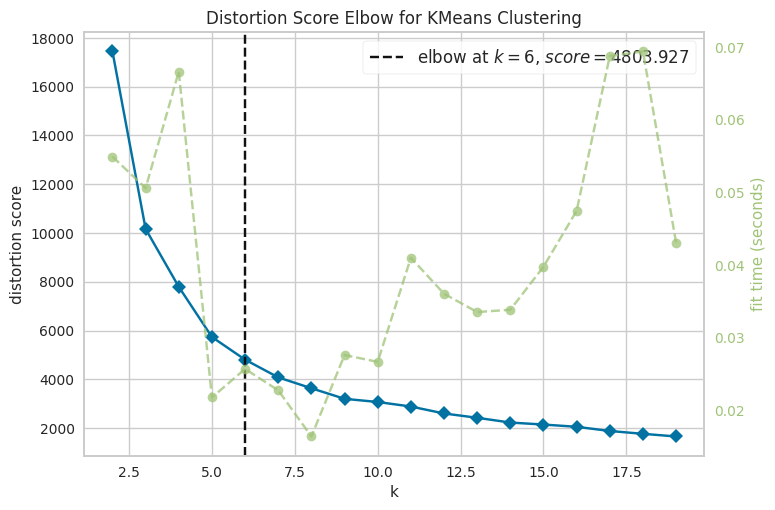

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [85]:
elbow_vis = KElbowVisualizer(KMeans(random_state=18), k=(2, 20))
elbow_vis.fit(X)
elbow_vis.show()

In [86]:
km_model = KMeans(n_clusters=6, random_state=18)
km_model.fit(X_robust_scaler)

,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,18
,copy_x,True
,algorithm,'lloyd'


In [87]:
df['cluster'] = km_model.fit_predict(X)
df

,MedInc,Latitude,Longitude,cluster
0,8.3252,37.88,-122.23,1
1,8.3014,37.86,-122.22,1
2,7.2574,37.85,-122.24,1
3,5.6431,37.85,-122.25,1
4,3.8462,37.85,-122.25,5
...,...,...,...,...
20635,1.5603,39.48,-121.09,5
20636,2.5568,39.49,-121.21,5
20637,1.7000,39.43,-121.22,5
20638,1.8672,39.43,-121.32,5


### Visualizamos en grafico 3D

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

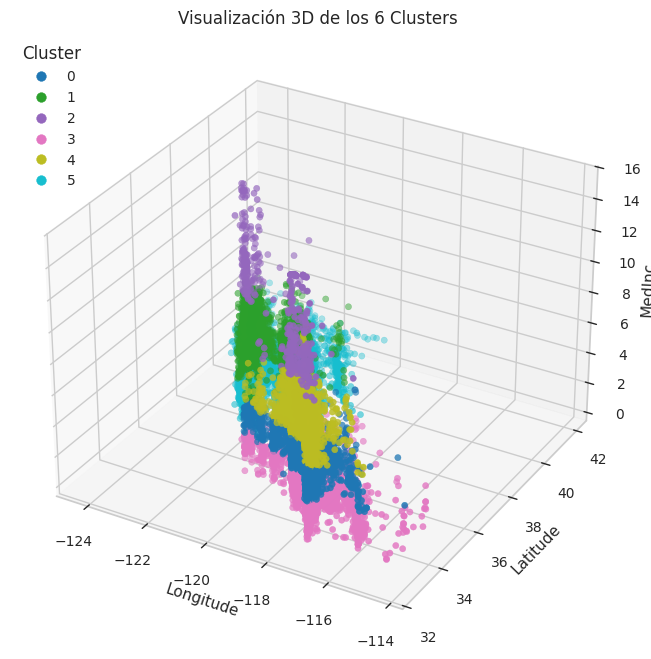

In [88]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

x = df['Longitude']
y = df['Latitude']
z = df['MedInc']
c = df['cluster']

scatter = ax.scatter(x, y, z, c=c, cmap='tab10')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('MedInc')
ax.set_title('Visualización 3D de los 6 Clusters')

legend1 = ax.legend(*scatter.legend_elements(), title="Cluster", loc='upper left')

### Calculamos ingreso medio por cluster

In [122]:
inc_mean = df.groupby('cluster')['MedInc'].mean().sort_index()
inc_mean

cluster
0     4.185683
1     5.301413
2    10.921274
3     2.379776
4     6.487549
5     2.720194
Name: MedInc, dtype: float64

### Visualizamos en grafico de barras

/tmp/ipykernel_1059/3693421243.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=inc_mean.index, y=inc_mean.values, palette='tab10')
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

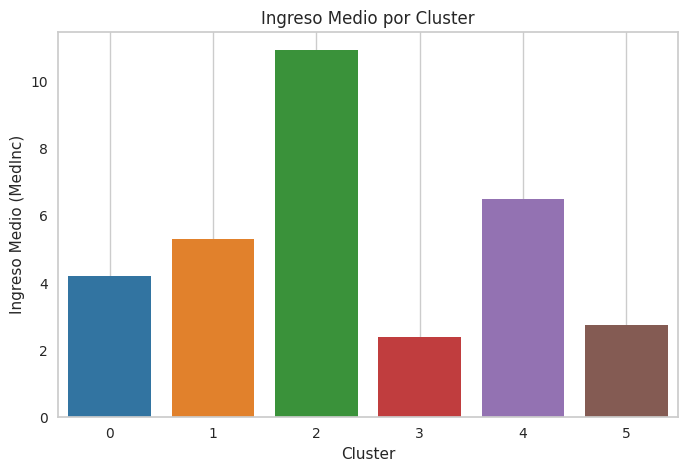

In [123]:
plt.figure(figsize=(8, 5))
sns.barplot(x=inc_mean.index, y=inc_mean.values, palette='tab10')
plt.title('Ingreso Medio por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Ingreso Medio (MedInc)')
plt.grid()
plt.show()

### Creamos subgrupos para los ingresos



Separandolos en:

1. Ingreso Bajo
2. Ingreso Medio
3. Ingreso Alto

In [124]:
cluster_in_clases = {0: 'Ingreso Medio',
                    1: 'Ingreso Medio',
                    2: 'Ingreso Alto',
                    3: 'Ingreso Bajo',
                    4: 'Ingreso Alto',
                    5: 'Ingreso Bajo'}

df['clase'] = df['cluster'].map(cluster_in_clases)

In [125]:
df

,MedInc,Latitude,Longitude,cluster,clase
0,8.3252,37.88,-122.23,1,Ingreso Medio
1,8.3014,37.86,-122.22,1,Ingreso Medio
2,7.2574,37.85,-122.24,1,Ingreso Medio
3,5.6431,37.85,-122.25,1,Ingreso Medio
4,3.8462,37.85,-122.25,5,Ingreso Bajo
...,...,...,...,...,...
20635,1.5603,39.48,-121.09,5,Ingreso Bajo
20636,2.5568,39.49,-121.21,5,Ingreso Bajo
20637,1.7000,39.43,-121.22,5,Ingreso Bajo
20638,1.8672,39.43,-121.32,5,Ingreso Bajo


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


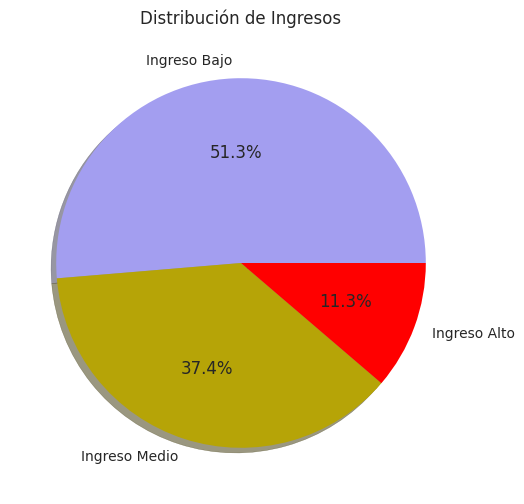

In [114]:
clase_counts = df['clase'].value_counts()


colors = ["#a39ef0", "#b6a407", "#ff0000"]
plt.figure(figsize=(6,6))
plt.pie(clase_counts, labels=clase_counts.index, autopct='%1.1f%%', shadow=True, colors=colors)
plt.title("Distribución de Ingresos")
plt.show()

### Visualizamos en mapa real

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

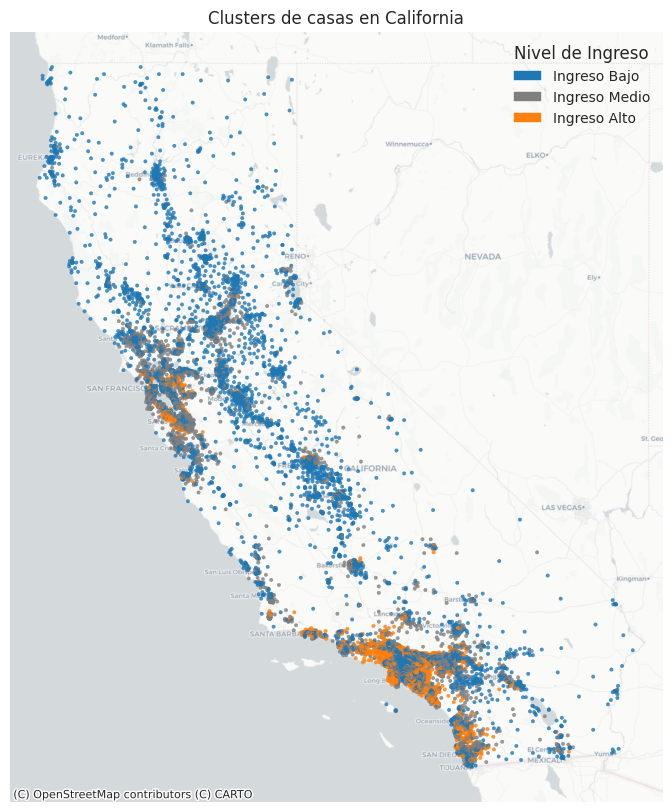

In [120]:
# Crear GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']), crs='EPSG:4326')
gdf = gdf.to_crs(epsg=3857)

colors = {'Ingreso Bajo': '#1f77b4',
          'Ingreso Medio': '#7f7f7f',
          'Ingreso Alto': '#ff7f0e'}

ax = gdf.plot(figsize=(12, 10),
              color=gdf['clase'].map(colors),
              markersize=6,
              alpha=0.8)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

patches = [mpatches.Patch(color=col, label=clase) for clase, col in colors.items()]
plt.legend(handles=patches, title="Nivel de Ingreso")
plt.title("Clusters de casas en California")
plt.axis('off')

plt.show()

## Modelo Supervisado

### Split X , y

In [129]:
X = df.drop(['cluster', 'clase'], axis=1)
y = df['cluster'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### LogisticRegression

In [131]:
lg_model = LogisticRegression(random_state=42, max_iter=1000,solver="liblinear")
lg_model.fit(X_train, y_train)

/workspaces/machine-learning-elius123ef/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


#### Resultado de la prediccion 

In [142]:
metrics = {"Accuracy Train: ": accuracy_score( lg_model.predict(X_train), y_train),
           "Accuracy Test ": accuracy_score(lg_model.predict(X_test), y_test)}
metrics

{'Accuracy Train: ': 0.8657620547613278, 'Accuracy Test ': 0.8759389386963896}

### Randomforest

In [133]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Resultado de la prediccion

In [141]:
metrics = {"Accuracy Train: ": accuracy_score( rf_model.predict(X_train), y_train),
           "Accuracy Test ": accuracy_score(rf_model.predict(X_test), y_test)}
metrics

{'Accuracy Train: ': 1.0, 'Accuracy Test ': 0.9963653985946208}

### KNeighbors

In [137]:
kn_model = KNeighborsClassifier()
kn_model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


#### Resultado de la prediccion

In [140]:
metrics = {"Accuracy Train: ": accuracy_score(kn_model.predict(X_train), y_train),
           "Accuracy Test ": accuracy_score(kn_model.predict(X_test), y_test)}
metrics

{'Accuracy Train: ': 0.994063484371214, 'Accuracy Test ': 0.9866731281802762}

## Comparacion de modelos

LogisticRegression

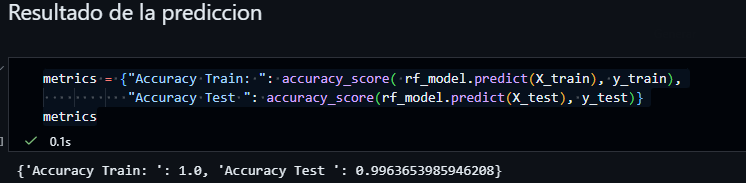

RandomForest

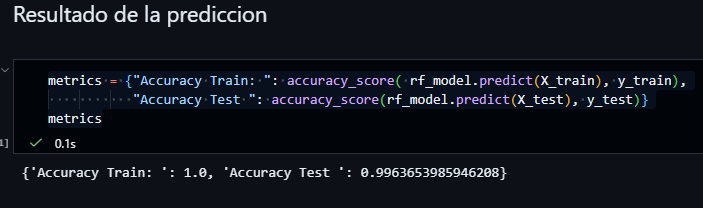

KNeighbors

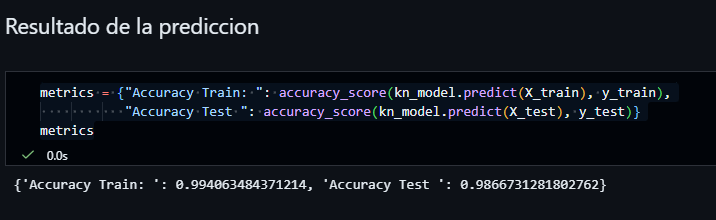

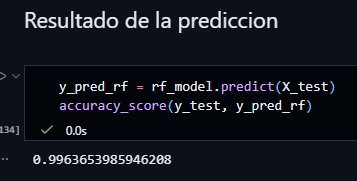
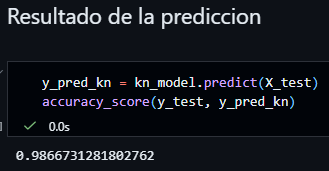

## Conclusiones generales

**Fase de Modelado No Supervisado (K-Means):**

1. Preparacion de Datos: Se realizo una limpieza y preprocesamiento de datos esenciales, incluyendo la eliminacion de 5 duplicados y el escalado de las caracteristicas mediante el RobustScaler para mitigar el impacto de valores atipicos en el clustering.

2. Determinacion de Clusters: La aplicacion del Método del Codo (KElbowVisualizer) recomendo la creacion de 6 clusters como número optimo para segmentar los datos de manera significativa.

3. Agrupacion: El modelo K-Means se entreno para clasificar los datos en 6 grupos. La visualizacion de los resultados demostro que el modelo genero agrupaciones geograficamente coherentes (por Latitud y Longitud) y que estas regiones se correlacionan claramente con distintos niveles de ingreso medio, validando la utilidad del clustering. El modelo de K-Means fue guardado para su uso futuro.

**Fase de Modelado Supervisado y Evaluacion:**

El paso mas importante fue utilizar la etiqueta de cluster generada por el K-Means como la variable objetivo para un problema de clasificacion supervisada.

1. Entrenamiento y Comparacion de Modelos: Se entrenaron tres modelos de clasificacion utilizando las coordenadas geograficas y el ingreso medio como predictores de la etiqueta del cluster:

- Regresion Logística

- Clasificador de Bosque Aleatorio (Random Forest Classifier)

- Clasificador K Vecinos mas Cercanos (KNeighbors Classifier)

2. Rendimiento: El modelo que obtuvo el mejor rendimiento fue el Random Forest Classifier, alcanzando una precision de aproximadamente 99% en el conjunto de prueba, demostrando una alta capacidad para predecir la clasificacion regional y de ingresos de nuevas viviendas.

Conclusion Final: La precision alcanzada por el Random Forest (99%) confirma que el etiquetado automatico generado por el K-Means es robusto y util, permitiendo la construccion de un modelo supervisado con alta capacidad predictiva para clasificar nuevas instancias de datos. Este modelo (Random Forest) fue guardado como el modelo de clasificacion final del proyecto.

### Guardamos el modelo 

In [ ]:
with open('../models/09-rf-model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)